In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
wind_capacity_data = pd.read_csv('wind_capacity_mess_around_data.csv')
wind_capacity_data.replace({np.nan:None, '%':''}, inplace=True)
wind_capacity_data['wind_capacity_data'] = wind_capacity_data['wind electric load'].apply(lambda value: float(value))

In [40]:
def pull_target_wind_capacity_factor(row):
    if row['2015_2019_capactity_factors'] == None:
        
        if row['1998_2019_capactity_factors'] == None:
            if row['1998_2016_capactity_factors'] == None:
                return None
            else: 
                return float(row['1998_2016_capactity_factors']) * 100
        else: 
            return float(row['1998_2019_capactity_factors']) * 100
    else: 
        return float(row['2015_2019_capactity_factors']) * 100
    
wind_capacity_data['target_wind_capacity'] = wind_capacity_data.apply(lambda row: pull_target_wind_capacity_factor(row), axis=1)

In [59]:
def plot_data(wind_data):
    return sns.regplot(data=wind_data, x='wind electric load', y='target_wind_capacity')

In [60]:
east = wind_capacity_data.loc[wind_capacity_data['region']=='East']
west = wind_capacity_data.loc[wind_capacity_data['region']=='West']
midwest = wind_capacity_data.loc[wind_capacity_data['region']=='Midwest']
south = wind_capacity_data.loc[wind_capacity_data['region']=='South']

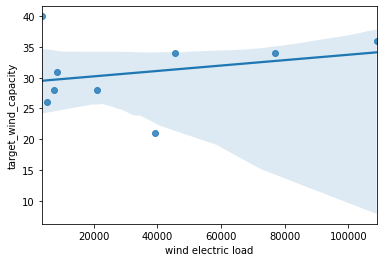

In [61]:
plot_data(east)

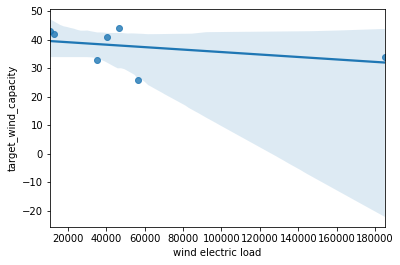

In [62]:
plot_data(west)

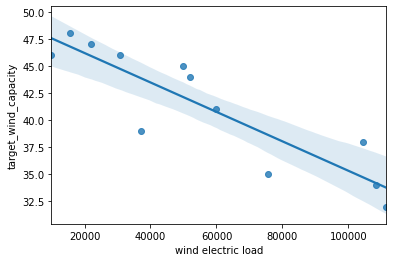

In [63]:
plot_data(midwest)

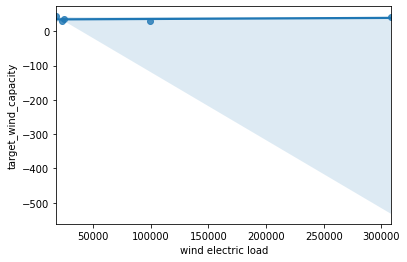

In [64]:
plot_data(south)

In [58]:
wind_capacity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        49 non-null     object 
 1   region                       49 non-null     object 
 2   wind capacity                49 non-null     float64
 3   wind electric load           49 non-null     float64
 4   1998_2019_capactity_factors  40 non-null     float64
 5   1998_2016_capactity_factors  34 non-null     float64
 6   2015_2019_capactity_factors  33 non-null     float64
 7   wind_capacity_data           49 non-null     float64
 8   target_wind_capacity         33 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.6+ KB
